# Machine Learning Workflow

1. Define Problem
2. Specify Inputs & Outputs
3. Exploratory Data Analysis
4. Data Collection
5. Data Preprocessing
6. Data Cleaning
7. Visualization
8. Model Design, Training, and Offline Evaluation
9. Model Deployment, Online Evaluation, and Monitoring
10. Model Maintenance, Diagnosis, and Retraining

In [1]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set(style='white', context='notebook', palette='deep')
pylab.rcParams['figure.figsize'] = 12,8
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

# Exploratory Data Analysis(EDA)
* Data Collection
* Visualization
* Data Preprocessing
* Data Cleaning

## Data Collection
Đây là quá trình thu thập bất kì dữ liệu nào đáng chú ý, có tiềm năng giải đáp vấn đầ của chúng ta.

In [5]:
df_train = pd.read_csv('raw/titanic/train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Visualization
Đây là bước biểu thị dữ liệu dưới dạng hình ảnh, đồ thị.

### Scatter Plot

[Scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) Xác định quan hệ giữa 2 đặc trưng.



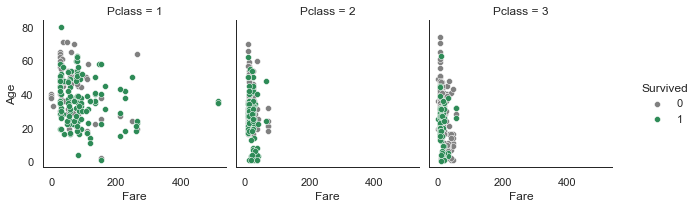

In [6]:
g = sns.FacetGrid(df_train, hue="Survived",
                  col="Pclass",
                  margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})
g = g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()


### Box
Box là phương pháp mô ta dữ liệu số thông qua những phần tư của chúng.
Chi tiết: 
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review
- https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule
<img src="https://miro.medium.com/max/13500/1*2c21SkzJMf3frPXPAR_gZA.png">


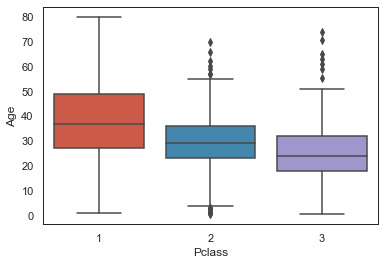

In [7]:
ax= sns.boxplot(x="Pclass", y="Age", data=df_train)
plt.show()


### Histogram

<Figure size 432x288 with 0 Axes>

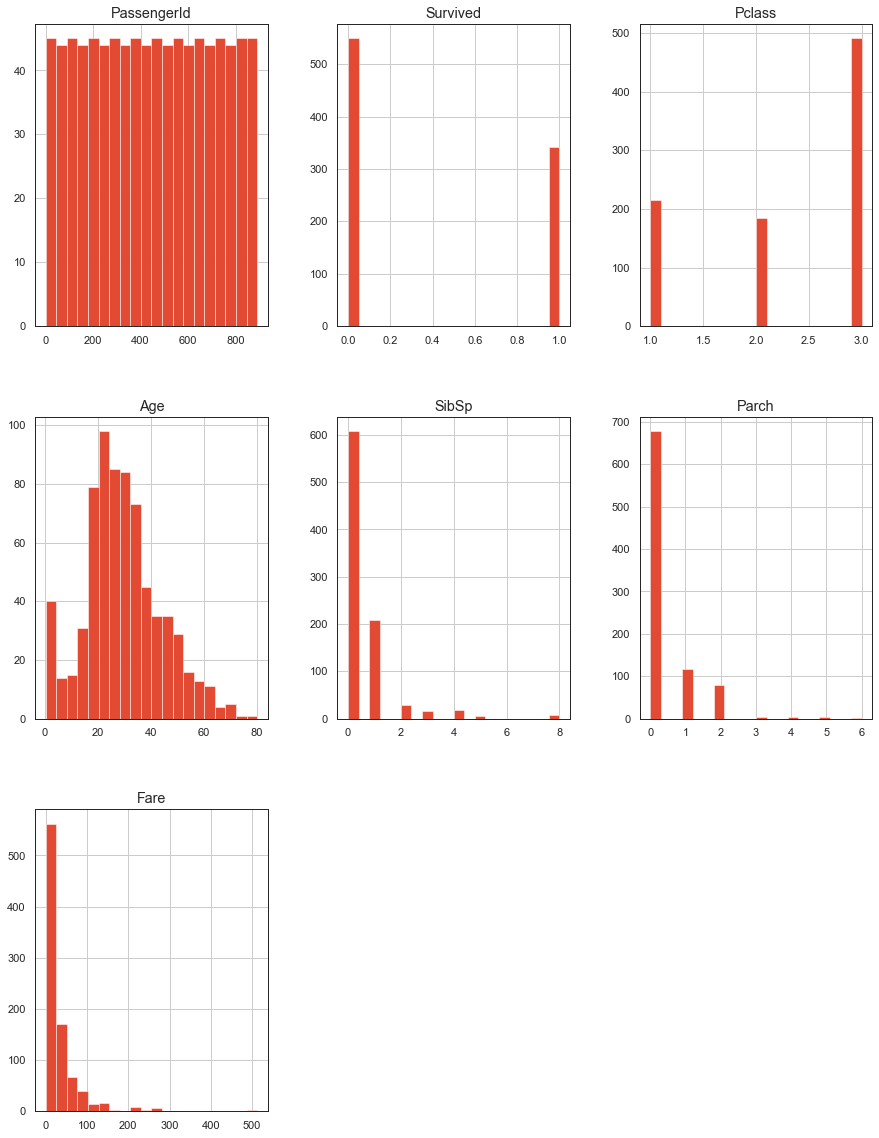

<Figure size 432x288 with 0 Axes>

In [8]:
df_train.hist(figsize=(15,20),bins=20)
plt.figure()

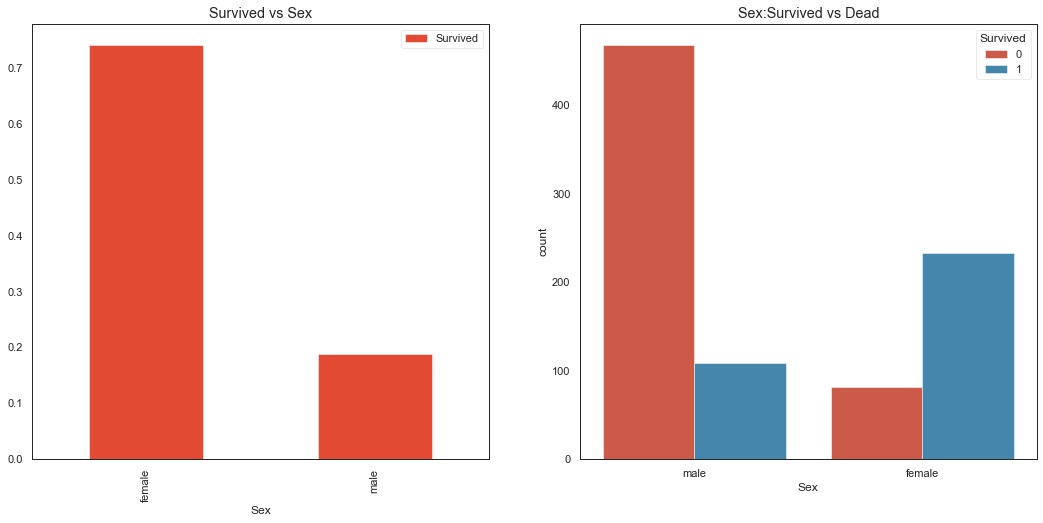

In [12]:
f, ax=plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

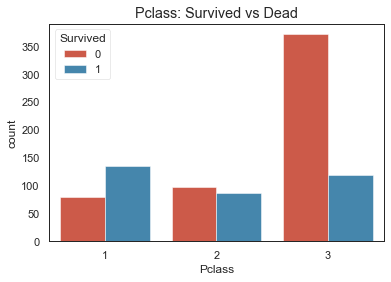

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=df_train)
plt.title('Pclass: Survived vs Dead')
plt.show()


### Pie

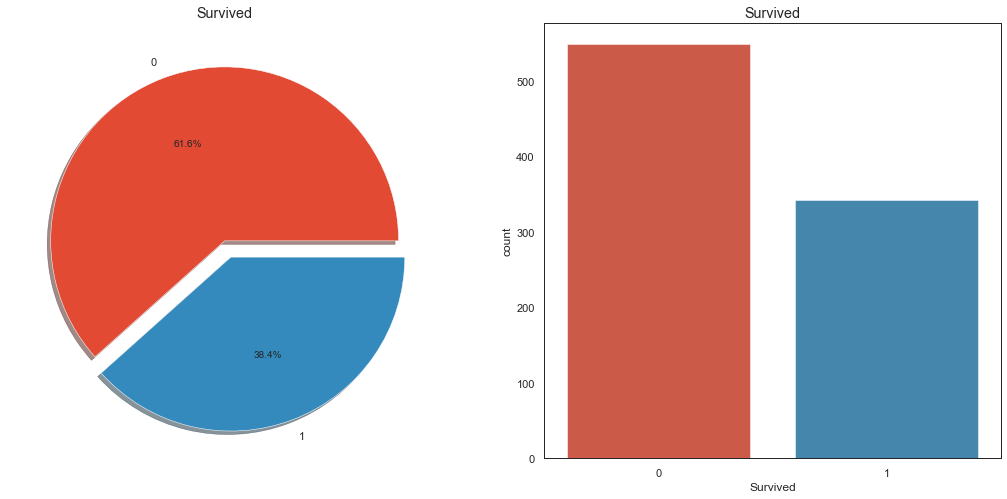

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

## Data Preprocessing
**Data preprocessing** là kĩ thuật chuẩn hóa, làm sạch dữ liệu trước khi đưa vào thuật toán.
Một vài bước tiêu biểu của Data preprocessing:
* Xử lý dữ liệu không cân bằng
* Xử lý dữ liệu bị thiếu
* Xử lý nhiễu
* Chuẩn hóa dữ liệu
* Chọn lọc đặc trưng
* ...

## Types of features
Features:
* số 
* theo từng mục (category)
* ngày tháng (datetime)

## Data exploration

In [18]:
df_train.shape

(891, 12)

In [19]:
df_train.size

10692

In [21]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
df_train = df_train.dropna()

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [24]:
df_train['Age'].unique()

array([38.  , 35.  , 54.  ,  4.  , 58.  , 34.  , 28.  , 19.  , 49.  ,
       65.  , 45.  , 29.  , 25.  , 23.  , 46.  , 71.  , 21.  , 47.  ,
       24.  , 32.5 , 37.  , 36.5 , 22.  , 61.  , 56.  , 50.  ,  1.  ,
        3.  , 44.  ,  2.  , 40.  , 31.  , 32.  , 62.  , 30.  , 52.  ,
       63.  , 36.  ,  0.92, 17.  , 18.  , 16.  , 45.5 , 41.  , 60.  ,
       27.  , 33.  , 14.  , 64.  , 48.  , 55.  , 39.  , 53.  , 42.  ,
       80.  , 15.  , 70.  ,  6.  , 51.  , 57.  , 43.  , 11.  , 26.  ])

In [26]:
df_train["Pclass"].value_counts()

1    158
2     15
3     10
Name: Pclass, dtype: int64

In [27]:
df_train.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [28]:
df_train.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
df_train.sample(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
748,749,0,1,"Marvin, Mr. Daniel Warner",male,19.0,1,0,113773,53.1000,D30,S


In [30]:
df_train.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [31]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
df_train[df_train['Age']==30]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
520,521,1,1,"Perreault, Miss. Anne",female,30.0,0,0,12749,93.5000,B73,S


In [34]:
X = df_train.iloc[:, :-1].values
y = df_train.iloc[:, -1].values 

In [35]:
X[0]

array([2, 1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'female', 38.0, 1, 0, 'PC 17599', 71.2833, 'C85'], dtype=object)

=============================================

In [32]:
x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

In [33]:
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)

In [34]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
85,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,NaN,S
794,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
161,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.7500,NaN,S
815,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S


## Feature transformations
Chúng ta sẽ chuyển đổi dữ liệu sang một dạng mới với kì vọng sẽ đem lại giá trị tốt hơn cho việc phân tích, đưa ra quyết định
Ở đây chúng ta sẽ biến đổi:
1. Age
1. Cabin
1. Fare
1. Name

In [44]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

df_train = transform_features(df_train)
df_train.head() 

ValueError: fill value must be in categories

## Feature Encoding

Một số cách mã hóa đặc trưng:
- One hot encoding
- TFIDF

In [42]:
def encode_features(df_train):
    features = ['Fare', 'Cabin', 'Age', 'Sex', 'Lname', 'NamePrefix']
    df_combined = df_train[features]
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
    return df_train

## Prepare Features & Targets

* X ==>> Feature
* y ==>> Target

In [43]:
#Encode Dataset
df_train = encode_features(df_train)
df_train.head()

TypeError: argument must be a string or number

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(df_train["Age"]).reshape(-1, 1)
fares_train = np.array(df_train["Fare"]).reshape(-1, 1)

df_train["Age"] = scaler.fit_transform(ages_train)
df_train["Fare"] = scaler.fit_transform(fares_train)

Chuẩn bị X(features) , y(target)

In [38]:
x_all = df_train.drop(['Survived', 'PassengerId'], axis=1)
y_all = df_train['Survived']

In [39]:
num_test = 0.3
X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=num_test, random_state=100)

<a id="76"></a> <br>
## Logistic Regression

In [40]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

ValueError: could not convert string to float: 'S'